Machine Learning for Data Science

Question : Implement decision tree algorithm and test the algorithm using any data set of your choice from UCI repository. The output should include Accuracy, Error rate, Precision and recall rate along with the confusion matrix.

Load libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Loading Data

pima indian dataset- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

In [9]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("C:/Users/veniniyan/Downloads/pima-indians-diabetes.csv", header=None, names=col_names)

In [10]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Feature Selection

In [11]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

Splitting Data

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Building Decision Tree Model

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Evaluating Model

Accuracy

In [23]:
print("The Accuracy value is:",metrics.accuracy_score(y_test, y_pred))

The Accuracy value is: 0.670995670995671


Confusion Matrix

In [15]:
matrix=metrics.confusion_matrix(y_test,y_pred)
matrix

array([[110,  36],
       [ 40,  45]], dtype=int64)

In [16]:
TP=matrix[0,0]
TN=matrix[1,1]
FP=matrix[0,1]
FN=matrix[1,0]

Precision

In [17]:
Precision=float(TP/(TP+FP))
print("The precision value is : ",Precision)

The precision value is :  0.7534246575342466


Recall

In [18]:
Recall=float(TP/(TP+FN))
print("The recall is : ",Recall)

The recall is :  0.7333333333333333


Error rate

In [19]:
total=TP+TN+FP+FN
Error_rate=float((FP+FN)/(total))
print("The Error Rate is : ",Error_rate)

The Error Rate is :  0.329004329004329


Visualizing Decision Trees

In [21]:
!pip install graphviz
!pip install pydotplus
!pip install six

C:\Users\veniniyan\anaconda3\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


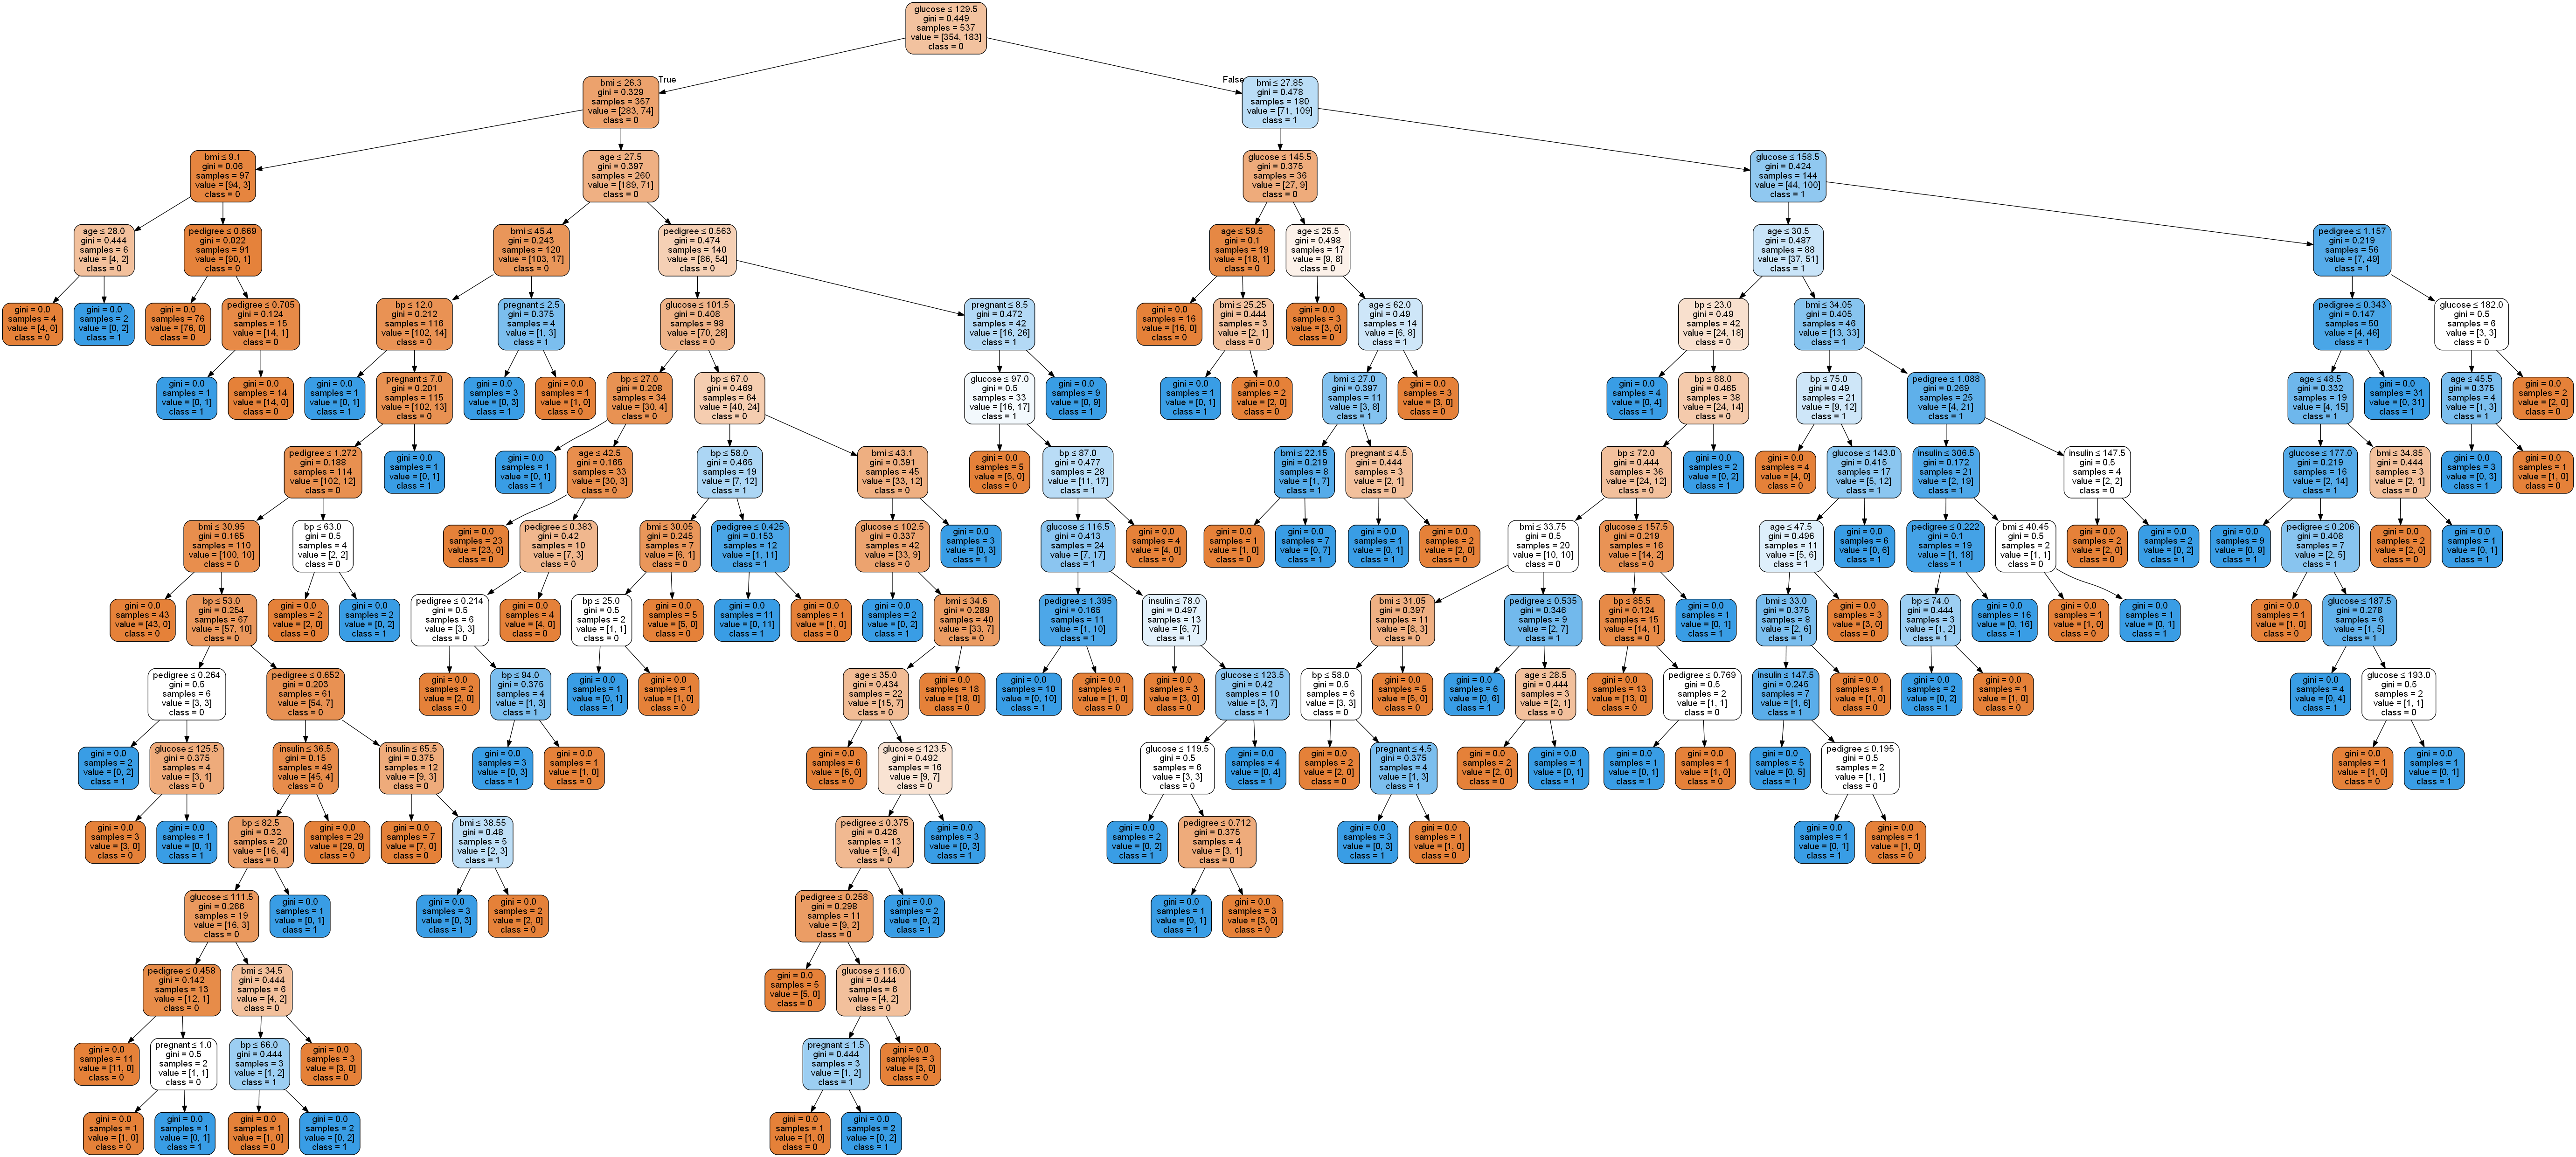

In [22]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())